In [40]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
import numpy as np

#--------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------
def confidence_ellipse(mean_x, mean_y, cov, ax, n_std=0.1, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
#     if x.size != y.size:
#         raise ValueError("x and y must be the same size")

#     cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
#     mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
#     mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)
#--------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------
def vis(box, ratio, padded_voxel_points, padded_voxel_points_teacher, cmap):
    plt.clf()
#     fig = plt.figure()
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_axes([0,0,1,1])
    
    
    
    ax.imshow(
                np.max(padded_voxel_points, axis=2),
                cmap = cmap,
                alpha=1,
                zorder=1,
            )
    
    ax.imshow(
                np.max(padded_voxel_points_teacher, axis=2),
                cmap = "Blues",
                alpha=0.7,
                zorder=1,
            )

    # plot the gt boxes
    for k in range(box["groundtruth"].shape[0]):

        gt = np.concatenate((box["groundtruth"], np.expand_dims(box["groundtruth"][:, 0, :], axis=1)), axis=1)

        ax.plot(
            gt[k, :, 0]/0.25 + 128,
            gt[k, :, 1]/0.25 + 128 ,
            c="g",
            linewidth=3.0,
            zorder=20,
        )

    # plot the prediction boxes
    for k in range(box["mean"].shape[0]):

        corners = np.concatenate((box["mean"], np.expand_dims(box["mean"][:, 0, :], axis=1)), axis=1)

        ax.plot(
            corners[k, :, 0]/0.25 + 128,
            corners[k, :, 1]/0.25 + 128,
            c="r",
            linewidth=1.5,
            zorder=20,
        )

    # plot the covariance
    cov = box["covar"]

    for i in range(box["mean"].shape[0]):
        for j in range(box["mean"].shape[1]):
            mean_x = box["mean"][i,j,0]/0.25 + 128
            mean_y = box["mean"][i,j,1]/0.25 + 128
            confidence_ellipse(mean_x, mean_y, cov[i,j]/(0.25*0.25), ax, n_std=ratio, facecolor='tan', edgecolor='darkorange')
            
    plt.axis('off')
    plt.savefig('./global_view.svg')

# 1. Global View

<Figure size 432x288 with 0 Axes>

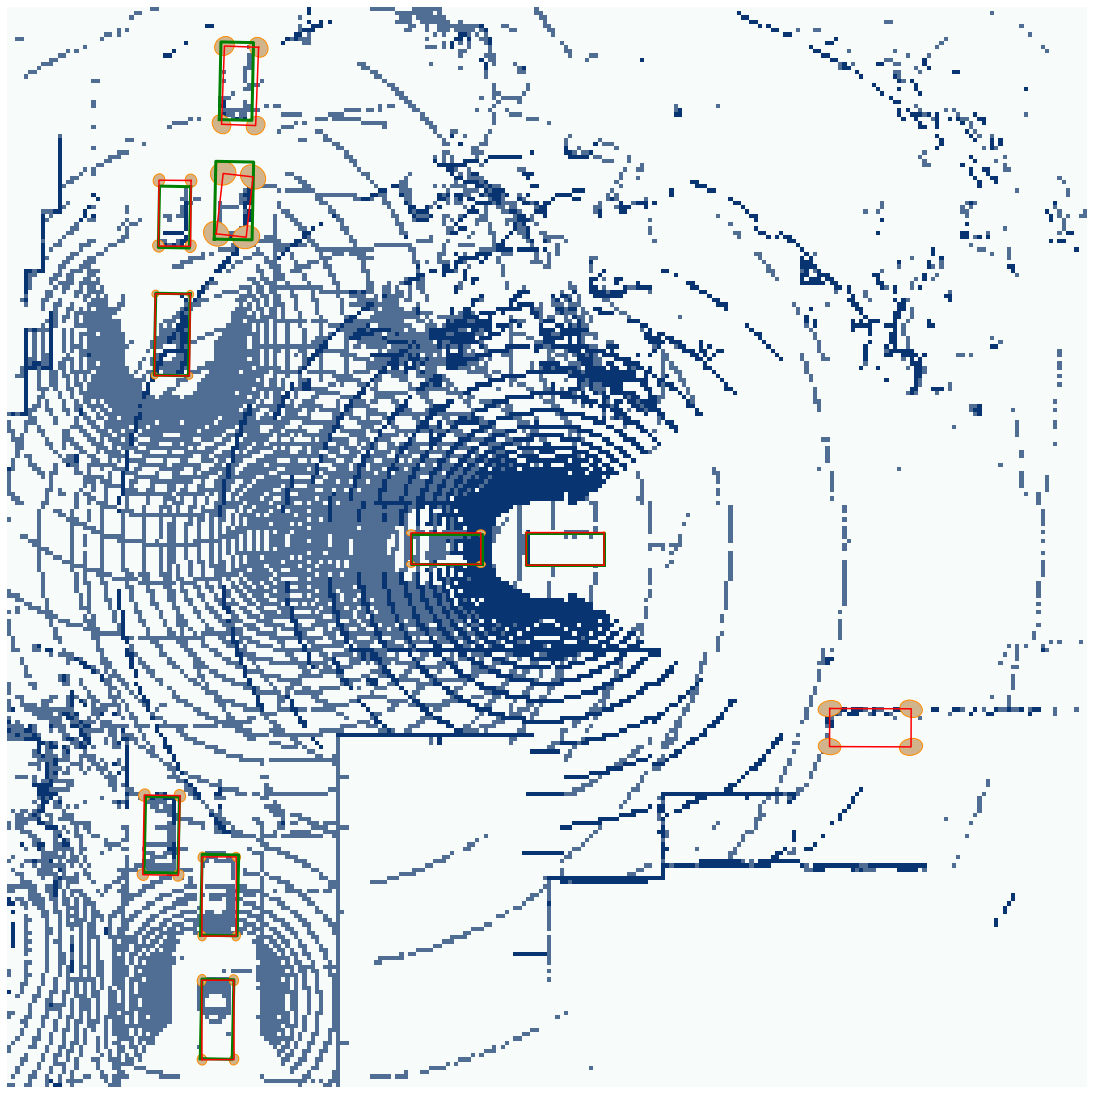

In [41]:
gt_dict = np.load("/home/yml/Downloads/test/agent1/5_20/0.npy", allow_pickle=True).item()
# print(gt_dict)
# indices = gt_dict["voxel_indices_teacher"]
indices = gt_dict["voxel_indices_0"]
padded_voxel_points = np.zeros((256,256,13), dtype=bool)
padded_voxel_points[indices[:, 0], indices[:, 1], indices[:, 2]] = 1
padded_voxel_points = np.rot90(padded_voxel_points, 3)
padded_voxel_points = padded_voxel_points.astype(np.float32)

indices_teacher = gt_dict["voxel_indices_teacher"]
padded_voxel_points_teacher = np.zeros((256,256,13), dtype=bool)
padded_voxel_points_teacher[indices_teacher[:, 0], indices_teacher[:, 1], indices_teacher[:, 2]] = 1
padded_voxel_points_teacher = np.rot90(padded_voxel_points_teacher, 3)
padded_voxel_points_teacher = padded_voxel_points_teacher.astype(np.float32)

# specify the result path
box = np.load("/home/yml/Downloads/disco_all/disco_dm/result1/5_20.npy", allow_pickle=True).item()
# box = np.load("/home/yml/Downloads/upperbound_all/upperbound_dm/result1/5_20.npy", allow_pickle=True).item()

cmap = 'GnBu'
# cmap = "PuBuGn"
vis(box, 2, padded_voxel_points, padded_voxel_points_teacher, cmap)

# 2. Local View

<Figure size 432x288 with 0 Axes>

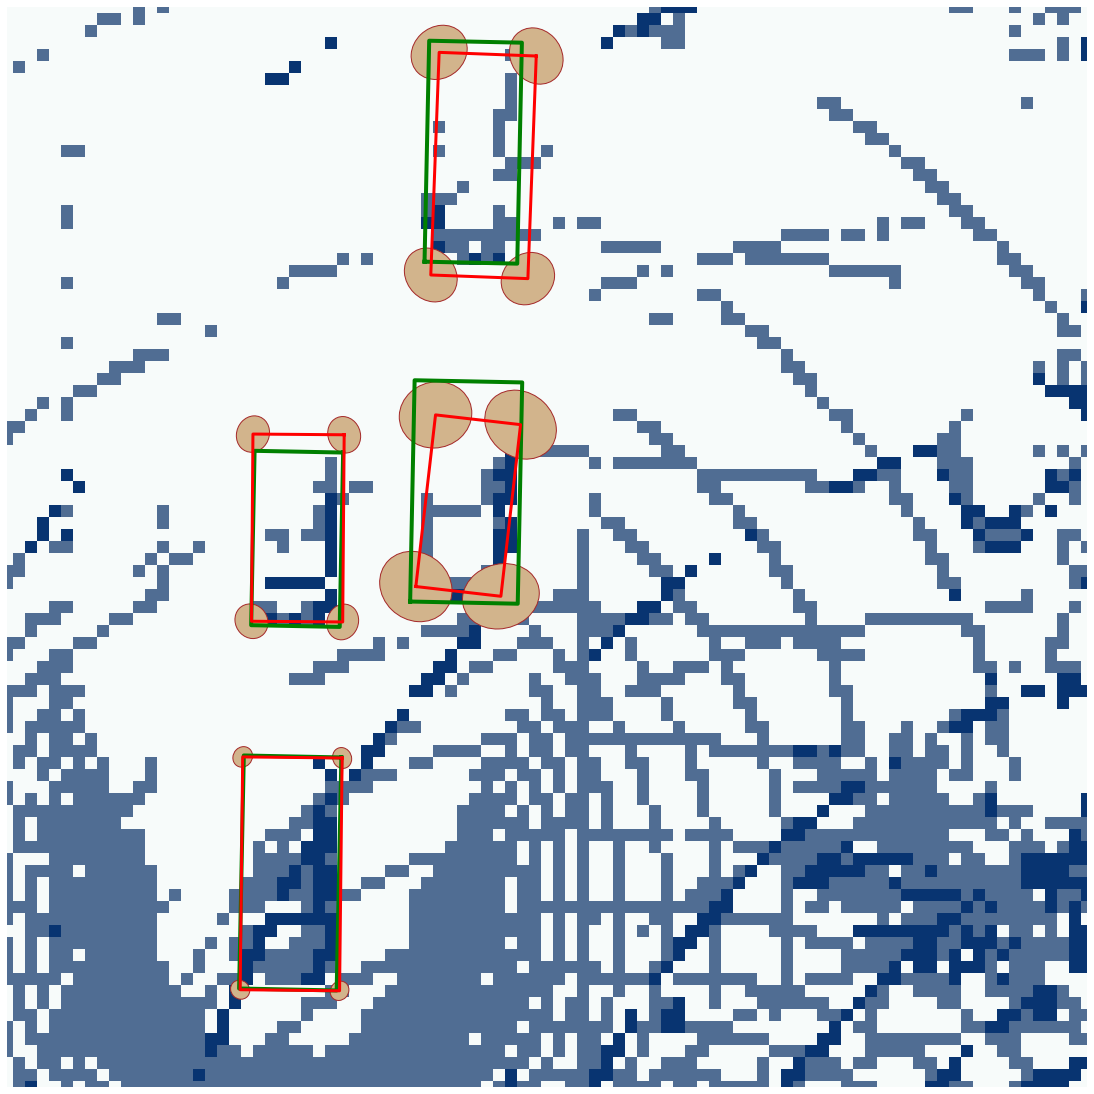

In [42]:
def vis(box, ratio, padded_voxel_points, padded_voxel_points_teacher, cmap):
    plt.clf()
#     fig = plt.figure()
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_axes([0,0,1,1])
    
    ax.imshow(
                np.max(padded_voxel_points, axis=2),
                cmap = cmap,
                alpha=1,
                zorder=1,
            )
    
    ax.imshow(
                np.max(padded_voxel_points_teacher, axis=2),
                cmap = "Blues",
                alpha=0.7,
                zorder=1,
            )

#     plot the gt boxes
    gt = np.concatenate((box["groundtruth"], np.expand_dims(box["groundtruth"][:, 0, :], axis=1)), axis=1)

    ax.plot(
        gt[1, :, 0]/0.25 + 128,
        gt[1, :, 1]/0.25 + 128 ,
        c="g",
        linewidth=4.0,
        zorder=20,
    )
    
    ax.plot(
        gt[3, :, 0]/0.25 + 128,
        gt[3, :, 1]/0.25 + 128 ,
        c="g",
        linewidth=4.0,
        zorder=20,
    )
    
    ax.plot(
        gt[2, :, 0]/0.25 + 128,
        gt[2, :, 1]/0.25 + 128 ,
        c="g",
        linewidth=4.0,
        zorder=20,
    )
    
    ax.plot(
        gt[8, :, 0]/0.25 + 128,
        gt[8, :, 1]/0.25 + 128 ,
        c="g",
        linewidth=4.0,
        zorder=20,
    )

    # plot the prediction boxes
    corners = np.concatenate((box["mean"], np.expand_dims(box["mean"][:, 0, :], axis=1)), axis=1)

    ax.plot(
        corners[8, :, 0]/0.25 + 128,
        corners[8, :, 1]/0.25 + 128,
        c="r",
        linewidth=3,
        zorder=20,
    )
    
    ax.plot(
        corners[7, :, 0]/0.25 + 128,
        corners[7, :, 1]/0.25 + 128,
        c="r",
        linewidth=3,
        zorder=20,
    )
    
    ax.plot(
        corners[5, :, 0]/0.25 + 128,
        corners[5, :, 1]/0.25 + 128,
        c="r",
        linewidth=3,
        zorder=20,
    )
    
    ax.plot(
        corners[1, :, 0]/0.25 + 128,
        corners[1, :, 1]/0.25 + 128,
        c="r",
        linewidth=3,
        zorder=20,
    )

    # plot the covariance
    cov = box["covar"]

    for j in range(box["mean"].shape[1]):
        mean_x = box["mean"][8,j,0]/0.25 + 128
        mean_y = box["mean"][8,j,1]/0.25 + 128
        confidence_ellipse(mean_x, mean_y, cov[8,j]/(0.25*0.25), ax, n_std=ratio, facecolor='tan', edgecolor='brown')
        gt_dict = np.load("/home/yml/Downloads/test/agent1/5_20/0.npy", allow_pickle=True).item()
        
    for j in range(box["mean"].shape[1]):
        mean_x = box["mean"][7,j,0]/0.25 + 128
        mean_y = box["mean"][7,j,1]/0.25 + 128
        confidence_ellipse(mean_x, mean_y, cov[7,j]/(0.25*0.25), ax, n_std=ratio, facecolor='tan', edgecolor='brown')
        gt_dict = np.load("/home/yml/Downloads/test/agent1/5_20/0.npy", allow_pickle=True).item()
        
    for j in range(box["mean"].shape[1]):
        mean_x = box["mean"][5,j,0]/0.25 + 128
        mean_y = box["mean"][5,j,1]/0.25 + 128
        confidence_ellipse(mean_x, mean_y, cov[5,j]/(0.25*0.25), ax, n_std=ratio, facecolor='tan', edgecolor='brown')
        gt_dict = np.load("/home/yml/Downloads/test/agent1/5_20/0.npy", allow_pickle=True).item()
        
    for j in range(box["mean"].shape[1]):
        mean_x = box["mean"][1,j,0]/0.25 + 128
        mean_y = box["mean"][1,j,1]/0.25 + 128
        confidence_ellipse(mean_x, mean_y, cov[1,j]/(0.25*0.25), ax, n_std=ratio, facecolor='tan', edgecolor='brown')
        gt_dict = np.load("/home/yml/Downloads/test/agent1/5_20/0.npy", allow_pickle=True).item()
        
    plt.xlim([15, 105])
    plt.ylim([95, 5])
    
    plt.axis('off')
        
    plt.savefig('./local_view.svg')
    

padded_voxel_points = np.zeros((256,256,13), dtype=bool)

indices = gt_dict["voxel_indices_0"]
padded_voxel_points = np.zeros((256,256,13), dtype=bool)
padded_voxel_points[indices[:, 0], indices[:, 1], indices[:, 2]] = 1
padded_voxel_points = np.rot90(padded_voxel_points, 3)
padded_voxel_points = padded_voxel_points.astype(np.float32)

indices_teacher = gt_dict["voxel_indices_teacher"]
padded_voxel_points_teacher = np.zeros((256,256,13), dtype=bool)
padded_voxel_points_teacher[indices_teacher[:, 0], indices_teacher[:, 1], indices_teacher[:, 2]] = 1
padded_voxel_points_teacher = np.rot90(padded_voxel_points_teacher, 3)
padded_voxel_points_teacher = padded_voxel_points_teacher.astype(np.float32)

# specify the result path
box = np.load("/home/yml/Downloads/disco_all/disco_dm/result1/5_20.npy", allow_pickle=True).item()
# box = np.load("/home/yml/Downloads/upperbound_all/upperbound_dm/result1/5_20.npy", allow_pickle=True).item()

cmap = 'GnBu'
# cmap = "PuBuGn"
vis(box,2,padded_voxel_points, padded_voxel_points_teacher, cmap)

# 3. Convex Hull

<Figure size 432x288 with 0 Axes>

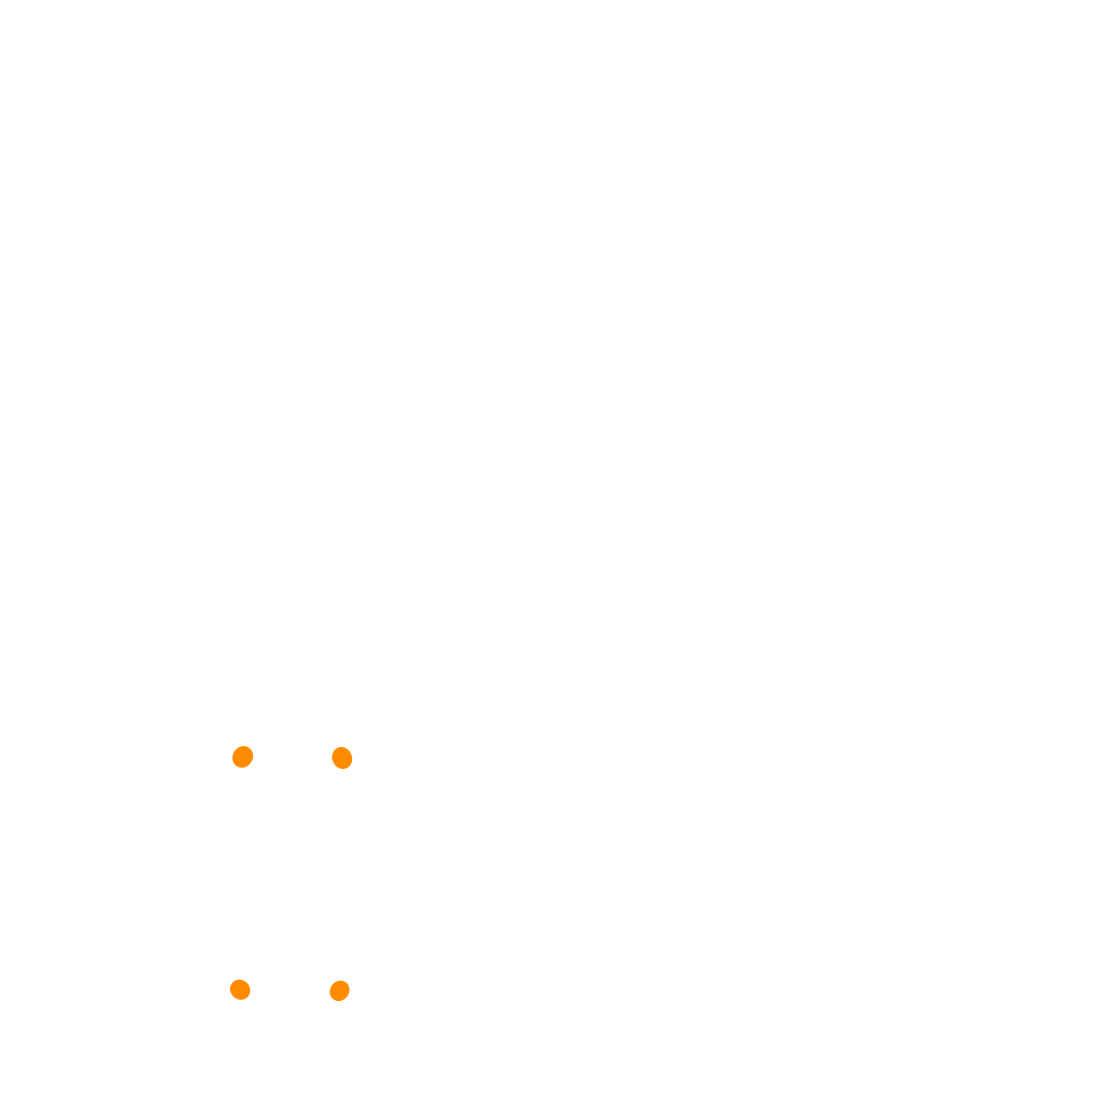

In [64]:
def vis(box, ratio, padded_voxel_points, cmap):
    plt.clf()
#     fig = plt.figure()
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_axes([0,0,1,1])
    
    # plot the covariance
    cov = box["covar"]

#     for j in range(box["mean"].shape[1]):
#         mean_x = box["mean"][8,j,0]/0.25 + 128
#         mean_y = box["mean"][8,j,1]/0.25 + 128
#         confidence_ellipse(mean_x, mean_y, cov[8,j]/(0.25*0.25), ax, n_std=ratio, facecolor='darkorange', edgecolor='darkorange')
#         gt_dict = np.load("/home/yml/Downloads/test/agent1/5_20/0.npy", allow_pickle=True).item()
        
#     for j in range(box["mean"].shape[1]):
#         mean_x = box["mean"][7,j,0]/0.25 + 128
#         mean_y = box["mean"][7,j,1]/0.25 + 128
#         confidence_ellipse(mean_x, mean_y, cov[7,j]/(0.25*0.25), ax, n_std=ratio, facecolor='darkorange', edgecolor='darkorange')
#         gt_dict = np.load("/home/yml/Downloads/test/agent1/5_20/0.npy", allow_pickle=True).item()
        
#     for j in range(box["mean"].shape[1]):
#         mean_x = box["mean"][5,j,0]/0.25 + 128
#         mean_y = box["mean"][5,j,1]/0.25 + 128
#         confidence_ellipse(mean_x, mean_y, cov[5,j]/(0.25*0.25), ax, n_std=ratio, facecolor='darkorange', edgecolor='darkorange')
#         gt_dict = np.load("/home/yml/Downloads/test/agent1/5_20/0.npy", allow_pickle=True).item()
        
    for j in range(box["mean"].shape[1]):
        mean_x = box["mean"][1,j,0]/0.25 + 128
        mean_y = box["mean"][1,j,1]/0.25 + 128
        confidence_ellipse(mean_x, mean_y, cov[1,j]/(0.25*0.25), ax, n_std=ratio, facecolor='darkorange', edgecolor='darkorange')
        gt_dict = np.load("/home/yml/Downloads/test/agent1/5_20/0.npy", allow_pickle=True).item()
        
        
    plt.xlim([15, 105])
    plt.ylim([95, 5])
    
    plt.axis('off')
        
    plt.savefig('./local.jpeg', dpi=500)
    

padded_voxel_points = np.zeros((256,256,13), dtype=bool)


box = np.load("/home/yml/Downloads/disco_all/disco_dm/result1/5_20.npy", allow_pickle=True).item()
cmap = 'GnBu'
# cmap = "PuBuGn"
vis(box,2,padded_voxel_points, cmap)

(7500, 7500, 3)
(7500, 7500)
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


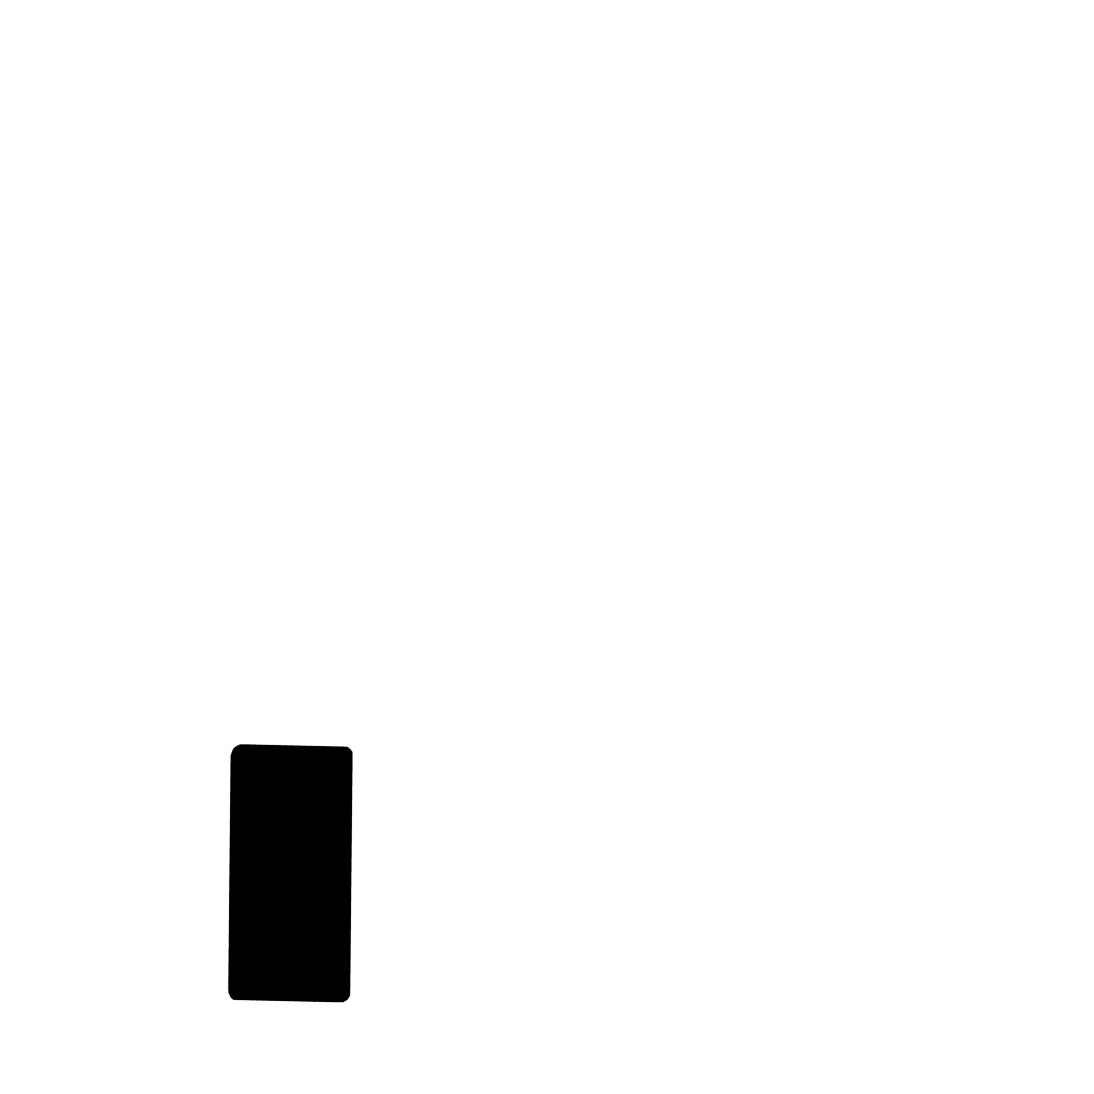

In [65]:
import matplotlib.pyplot as plt

from skimage.morphology import convex_hull_image
from skimage import data, img_as_float
from skimage.util import invert

from svglib.svglib import svg2rlg

# img_svg = svg2rlg('local.svg')
# print(img_svg)
img_svg = plt.imread('local.jpeg')
img_array = np.array(img_svg)
img_binary = img_array[:,:,0]!=255

print(img_array.shape)
print(img_binary.shape)


# The original image is inverted as the object must be white.
# image = invert(data.horse())

image = img_binary

print(image)
chull = convex_hull_image(image)

# fig, axes = plt.subplots(1, 2, figsize=(15, 15))
# ax = axes.ravel()

# ax[0].set_title('Original picture')
# ax[0].imshow(image, cmap=plt.cm.gray)
# ax[0].set_axis_off()

# ax[1].set_title('Transformed picture')
# # ax[1].imshow(chull, cmap=plt.cm.viridis) 
# ax[1].imshow(chull, cmap=plt.cm.viridis)
# ax[1].set_axis_off()

fig = plt.figure(figsize=(15,15))
ax = fig.add_axes([0,0,1,1])
ax.imshow(chull, cmap=plt.cm.Greys) #BuPu OrRd

# plt.tight_layout()
# plt.show()
plt.axis('off')
plt.savefig('./chull_4.svg')